# 2. Устройство изображения. Работа с изображением в Python.
## 2.1 Цифровое изображение. Чтение, запись, работа с пикселями
### 2.1.1 
Предположим, что вы хотите хранить цветные изображения с указанием прозрачности каждого пикселя. Для каждого пикселя потребуется хранить четыре числа: три цветных компоненты (R, G и B) со значениями в диапазоне [0..31] каждая и компоненту прозрачности — число в диапазоне [0..63]. Сколько бит потребуется для хранения значений одного пикселя?

`5 * 3 + 6 = 21`
### 2.1.2 Количество столбцов
Прочитайте изображение из файла img.png и выведите количество столбцов этого изображения на стандартный вывод.

In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = imread('https://stepik.org/media/attachments/lesson/58180/img.png')
img.shape[1]

419

### 2.1.3 Изменение цвета пикселя изображения
Прочитайте изображение из файла img.png. У этого изображения нечетное количество строк и столбцов. Поменяйте цвет центрального пикселя этого изображения на зеленый цвет rgb (102, 204, 102) и сохраните изображение в файл out_img.png.

True

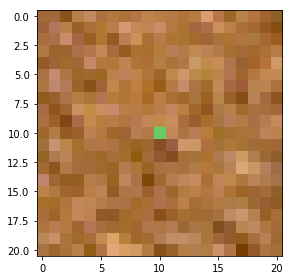

In [3]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-color.png')
img2 = imread('https://stepik.org/media/attachments/lesson/58180/tiger-color-green-pixel.png')

x1 = img.shape[0]//2
x2 = img.shape[1]//2

img[x1, x2] = [102, 204, 102]

imshow(img[x1-10:x1+11, x2-10:x2+11])
np.array_equal(img, img2)

### Копирование

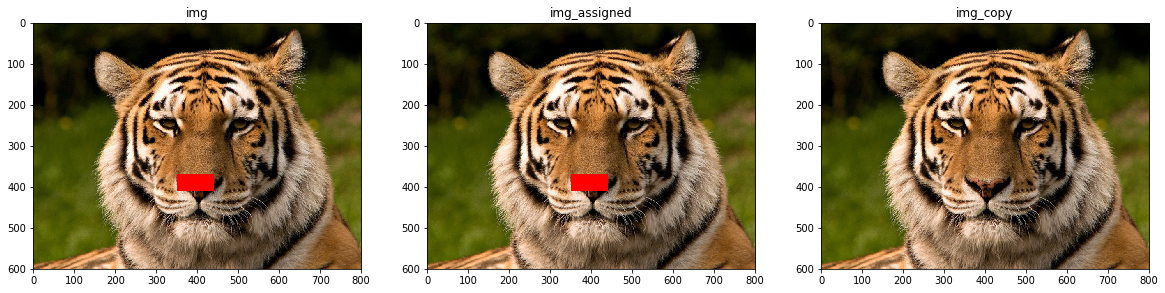

In [4]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-color.png')

img_assigned = img
img_copy = img.copy()
img[370:410, 350:440] = [255, 0, 0]


plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("img")
plt.imshow(img)

plt.subplot(1,3,2)
plt.title("img_assigned")
plt.imshow(img_assigned)

plt.subplot(1,3,3)
plt.title("img_copy")
plt.imshow(img_copy)

plt.show()

### 2.1.4 Изменение цвета прямоугольника
Загрузите изображение из файла img.png. Оно имеет нечетное количество строк и столбцов. В центре этого изображения находится прямоугольник размером 7 строк и 15 столбцов. Поменяйте его цвет на розовый rgb(255, 192, 203) и сохраните в файл out_img.png.

In [5]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-gray.png')
img2 = imread('https://stepik.org/media/attachments/lesson/58180/tiger-pink.png')

In [6]:
row_center = img.shape[0]//2
col_center = img.shape[1]//2
img[row_center - 3: row_center + 4, col_center - 7:col_center + 8] = [255, 192, 203]

np.array_equal(img, img2)


True

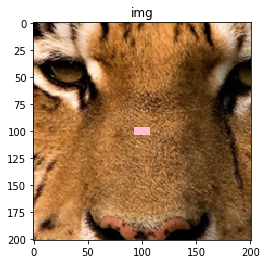

In [7]:
plt.title("img")
plt.imshow(img[row_center - 100: row_center + 101, col_center - 100:col_center + 101])
plt.show()

### 2.1.5 Определение рамки изображения
Изображение состоит из рамки сплошного цвета и внутренней части изображения. Цвет рамки можно узнать, посмотрев на левый верхний пиксель. Рамка может иметь разную ширину со всех четырех сторон. Определите размеры рамки и выведите эти размеры через пробел. Размеры рамки выводите в следующем порядке: левый, верхний, правый, нижний.

In [8]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-border.png')

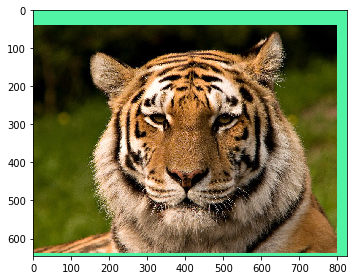

In [9]:
imshow(img)
plt.show()

#### Решение 1

In [10]:
x1, x2, x3 = np.where(img != img[0,0])

print(x2[0])
print(x1[0])
print(img.shape[1]-1-x2[-1])
print(img.shape[0]-1-x1[-1])

1
39
25
7


#### Решение 2

In [11]:
c = img[0,0] # border color

row = img.shape[0] - 1
col = img.shape[1] - 1

xs = col//2
ys = row//2

x1, x2, x3, x4 =  0, 0, 0, 0

for i in range(col):
    if all(c!= img[xs, i]):
        break
    x1 += 1
    
for i in range(row):
    if all(c!= img[i, ys]):
        break
    x2 += 1
    
for i in range(row):
    if all(c!= img[xs, col - i]):
        break
    x3 += 1
    
for i in range(col):
    if all(c!= img[row - i, ys]):
        break
    x4 += 1
    
print(x1, x2, x3, x4)

1 39 25 7


## 2.2 Арифметические операции. Каналы. Вычисление яркости изображения
### Теория

In [12]:
img = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')

In [13]:
img.dtype #0-255 = 1byte

dtype('uint8')

In [14]:
img_f = img_as_float(img)

In [15]:
img.min(), img.max()

(0, 255)

In [16]:
img_f.min(), img_f.max()

(0.0, 1.0)

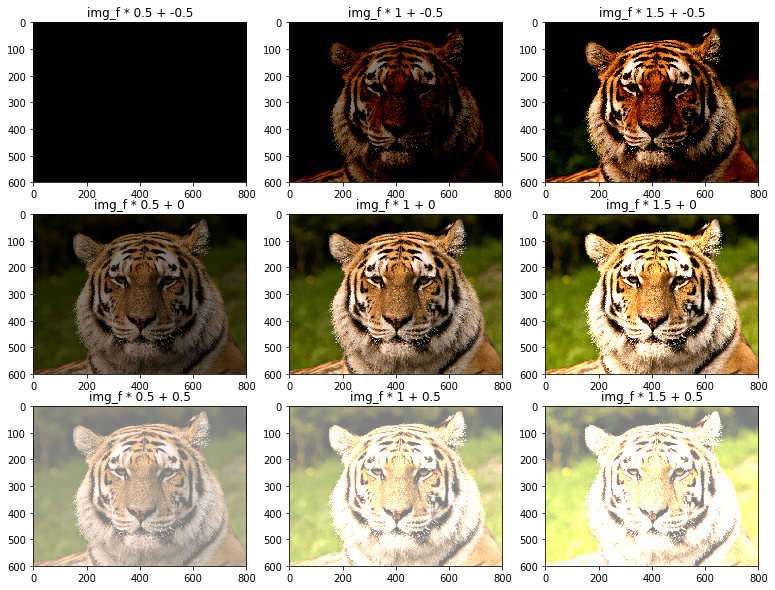

In [17]:
plt.figure(figsize=(13,10))
w1 = [ 0.5,  1,  1.5, 0.5, 1, 1.5, 0.5, 1, 1.5]
w2 = [-0.5, -0.5, -0.5, 0, 0, 0, 0.5, 0.5, 0.5]
n = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in n:
    plt.subplot(3,3,i)
    
    plt.title("img_f * " + str(w1[i-1]) + " + " + str(w2[i-1]))
    plt.imshow(np.clip(img_f * w1[i-1] + w2[i-1], 0, 1))
plt.show()

### 2.2.1 Вычисление негатива изображения
Прочитайте изображение из файла img.png. У этого изображения нечетное количество строк и столбцов. Вычислите негатив изображения и сохраните его в файл out_img.png.

In [18]:
img = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img2 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-negative.png')

In [19]:
np.array_equal(255-img, img2)

True

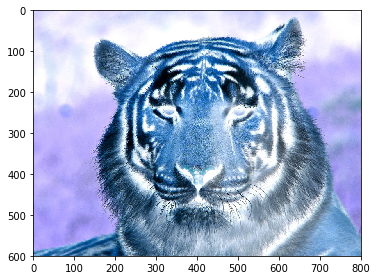

In [20]:
imshow(img2)
plt.show()

### Теория

In [21]:
img_f = img_as_float(img)
r = img_f[:,:, 0]
g = img_f[:,:, 1]
b = img_f[:,:, 2]

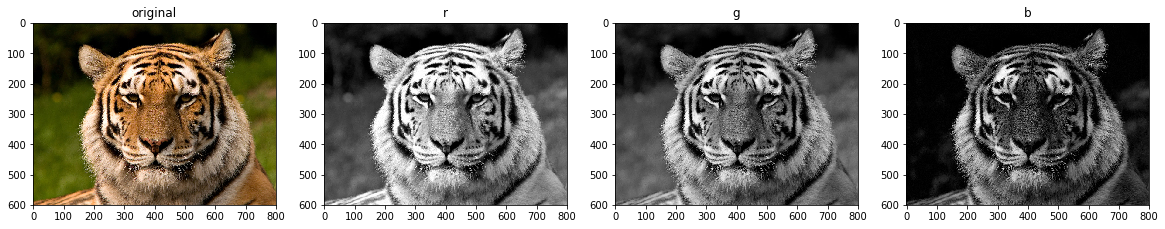

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title("original")
plt.imshow(img)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,2)
plt.title("r")
plt.imshow(r)
plt.subplot(1,4,3)
plt.title("g")
plt.imshow(g)
plt.subplot(1,4,4)
plt.title("b")
plt.imshow(b)
plt.show()

In [23]:
img_combined = np.dstack((r,g,b))
np.array_equal(img_combined, img_as_float(img))

True

In [24]:
avg_gray = (r + g + b) / 3

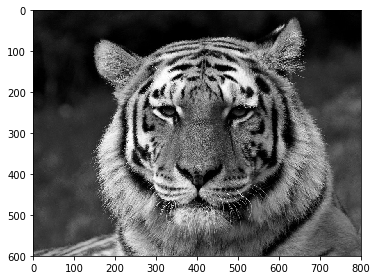

In [25]:
imshow(avg_gray)
plt.show()

### 2.2.2 Поменять местами каналы изображения
У этого изображения поменяйте местами каналы так, чтобы вместо порядка RGB каналы шли в порядке BRG.

In [26]:
img = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img2 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-brg.png')

In [27]:
r = img[:,:, 0]
g = img[:,:, 1]
b = img[:,:, 2]
#r, g, b = np.dsplit(img, 3)

img_brg = np.dstack((b,r,g))
np.array_equal(img_brg, img2)

True

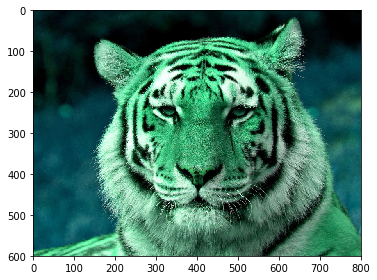

In [28]:
imshow(img_brg)
plt.show()

### Теория
Зеленая компонента вносит наибольший вклад в восприятие яркости изображения.
$Y = 0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

In [29]:
img_gray_1 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png', 1)
img_gray_2 = rgb2gray(imread('tiger-color.png'))
np.array_equal(img_gray_1, img_gray_2)

True

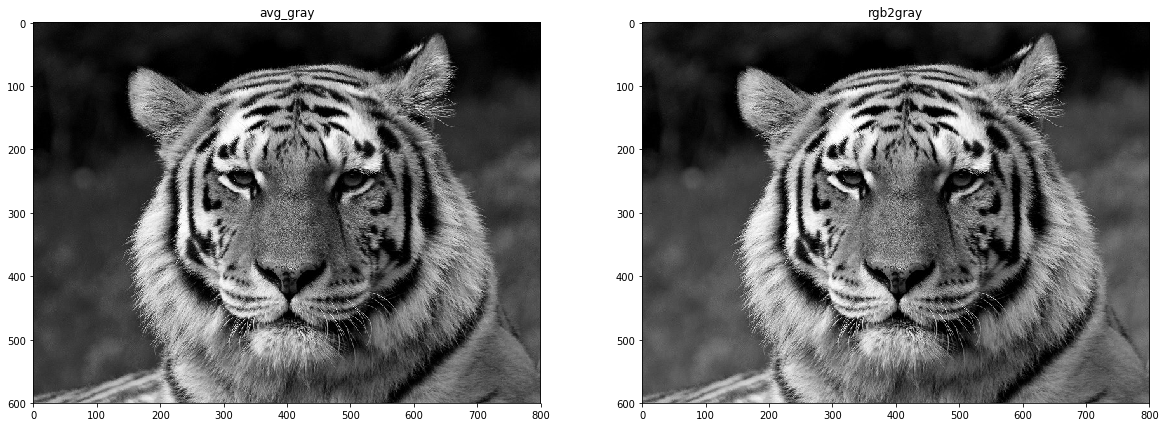

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("avg_gray")
plt.imshow(avg_gray)
#plt.set_cmap(cmap="gray")
plt.subplot(1,2,2)
plt.title("rgb2gray")
plt.imshow(img_gray_1)
plt.show()

In [31]:
np.array_equal(img_gray_1, avg_gray) #rgb2gray не через вычисление среднего работает

False

### 2.2.3 Подсчет яркости изображения
Подсчитайте яркость этого изображения и сохраните в файл out_img.png. Результирующее изображение должно быть одноканальным. Для подсчета яркости используйте формулу Y=0.2126⋅R+0.7152⋅G+0.0722⋅B, не забудьте сначала перевести изображение в вещественные числа (функция img_as_float), а затем в целые числа (функция img_as_ubyte).

In [32]:
img = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img2 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-y.png')

img = img_as_float(img)
img = 0.2126 * img[:,:,0] + 0.7152 * img[:,:,1] + 0.0722 * img[:,:,2]
img = img_as_ubyte(img)

np.array_equal(img, img2)

/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


True

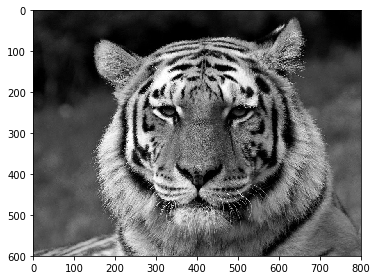

In [33]:
imshow(img)
plt.show()

## 2.3 Сопоставление фотографий Прокудина-Горского
### 2.3.1 Сопоставление фотографий Прокудина-Горского
Напишите функцию align, которая сопоставляет изображения с фотографий Прокудина-Горского и возвращает координаты точек на синем и красном каналах, как это описано в видео, слайдах и описании задания.
Прототип функции:
```
def align(img, g_coord):
    row_g, col_g = g_coord
    # считаем сдвиги каналов

    # сдвигаем точку на зеленом канале
    # на другие каналы
    return (row_b, col_b), (row_r, col_r)
```
Для вашего удобства приводится один тест. Вход: ссылка на изображение, координаты точки на зеленом канале. Выход: правильный ответ — координаты точек на синем и красном каналах.

Программа не должна ничего читать и писать на стандартный ввод и вывод, необходимо написать только функцию align.
Программа тестируется на 10 картинках: 00.png, 01.png, 02.png, 03.png, 04.png, 05.png, 06.png, 07.png, 08.png, 09.png. Однако координаты точек приводятся только для первого изображения. Проверьте перед посылкой решения в систему, что программа верно работает на остальных девяти изображениях. Для этого достаточно проверить, что изображения сопоставляются качественно, без визуальных артефактов.

In [34]:
#B G R

In [35]:
from numpy import roll

In [36]:
def align(img, g_coord):
    row_g, col_g = g_coord

    img_f = img_as_float(img)
        
    #деление пленки на три канала b g r
    height, width = img.shape
    height = img_f.shape[0]//3
    
    B = img_f[0 : height, 0 : width]
    G = img_f[height : height * 2, 0 : width]
    R = img_f[height * 2 : height * 3, 0 : width]
    
    img_f = np.dstack((R, G, B))
    
    #обрезка 
    pix = 30 
    row, col, _ = img_f.shape
    img_f = img_f[pix : row - pix, pix : col - pix]
    
    R = img_f[:,:,0]
    G = img_f[:,:,1]
    B = img_f[:,:,2]
    
    #синий относительно зеленого
    rows, columns = shift(B, G)
    #print("blue:")
    #print("shift rows: ", rows, "shift columns: ", columns)
    
    #Смещение координат зеленой точки по синему каналу
    row_b = row_g - rows - height #(высота канала)
    col_b = col_g - columns 
    
    B_shifted = np.roll(B, rows, axis = 0)
    B_shifted = np.roll(B_shifted, columns, axis = 1)
    
    #красный относительно зеленого
    rows, columns = shift(R, G)
    #print("red:")
    #print("shift rows: ", rows, " columns: ", columns)
    
    row_r = row_g - rows + height
    col_r = col_g - columns

    R_shifted = np.roll(R, rows, axis = 0)
    R_shifted = np.roll(R_shifted, columns, axis = 1)
    
    imshow(np.dstack((R_shifted, G, B_shifted)))

    return (row_b, col_b), (row_r, col_r)

def shift(img_s, img_b):
 
    shift = {} #хранение сдвига и корреляции

    for row in range(-15, 16): #30
        img_shift = np.roll(img_s, row, axis = 0) # rows

        for col in range(-15, 16):
            img_shift2 = np.roll(img_shift, col, axis = 1) # columns
            shift[row, col] = (img_shift2 * img_b).sum() # correlation
    r, c = max(shift, key=shift.get)
    return r, c

In [37]:
strn = []
for i in range(10):
    strn.append('https://stepik.org/media/attachments/lesson/58182/0' + str(i) + ".png")

((153, 236), (857, 238))

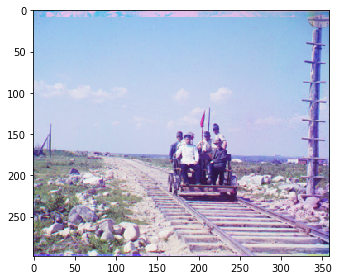

In [38]:
img = imread(strn[0])
align(img, (508, 237))

((170, 237), (841, 236))

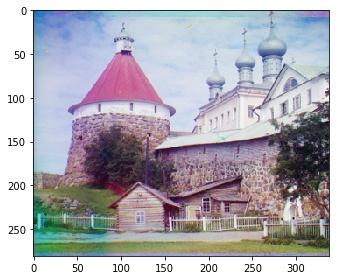

In [39]:
img = imread(strn[1])
align(img, (508, 237)) # random nums

((155, 239), (859, 236))

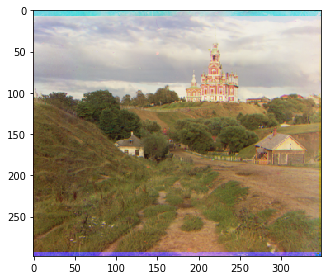

In [40]:
img = imread(strn[2])
align(img, (508, 237))

((124, 237), (891, 234))

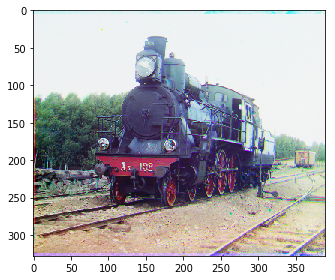

In [41]:
img = imread(strn[3])
align(img, (508, 237))

((122, 238), (889, 236))

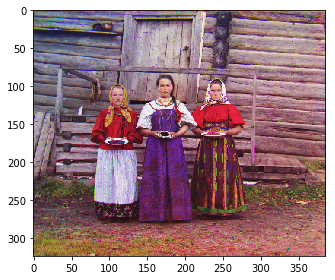

In [42]:
img = imread(strn[4])
align(img, (508, 237))

((125, 239), (889, 235))

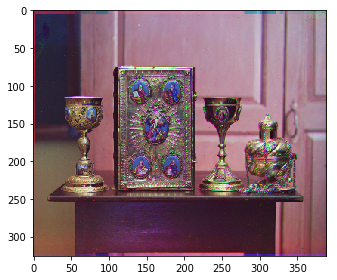

In [43]:
img = imread(strn[5])
align(img, (508, 237))

((125, 240), (889, 234))

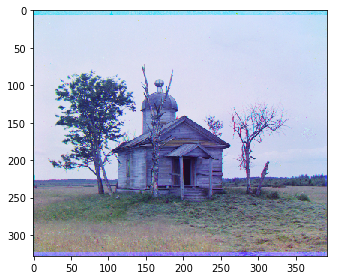

In [44]:
img = imread(strn[6])
align(img, (508, 237))

((161, 237), (854, 238))

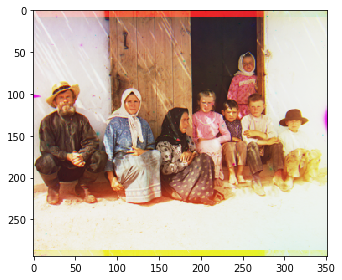

In [45]:
img = imread(strn[7])
align(img, (508, 237))

((129, 242), (886, 234))

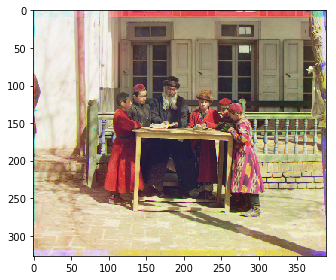

In [46]:
img = imread(strn[8])
align(img, (508, 237))

((129, 240), (886, 235))

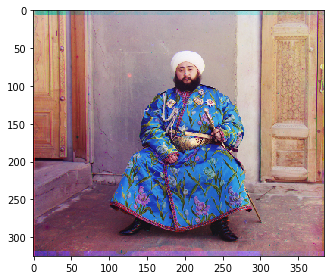

In [47]:
img = imread(strn[9])
align(img, (508, 237))